In [1]:
from radius import *
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 20,
})

T1130C_t8min


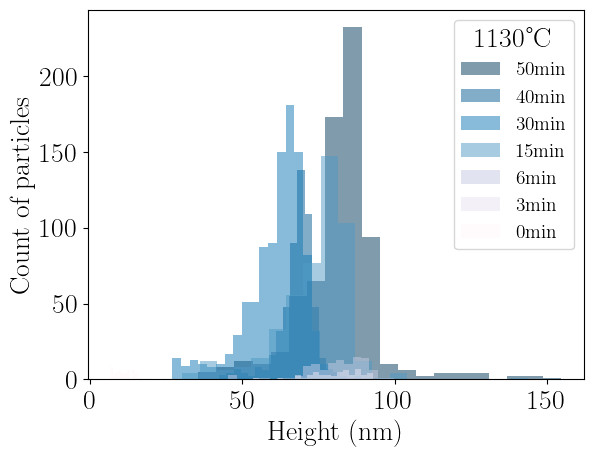

T1150C_t8min


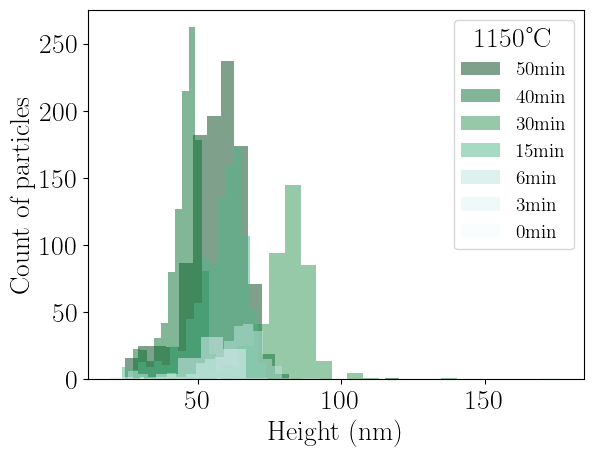

T1170C_t0min


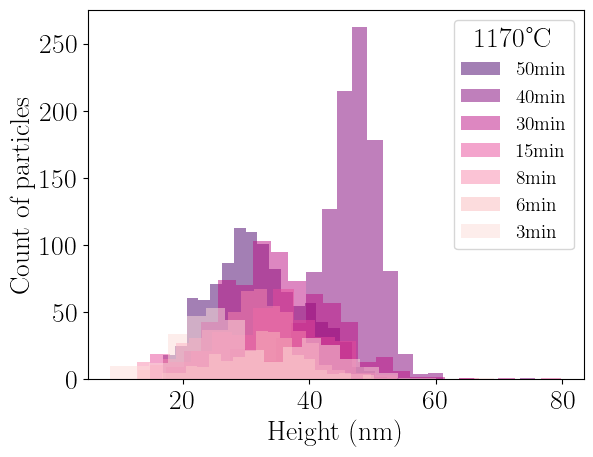

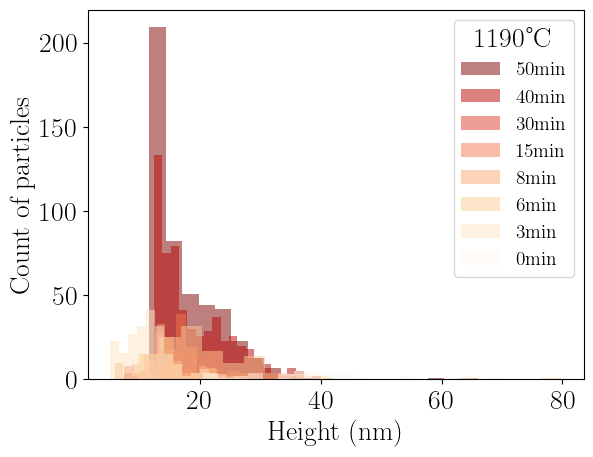

T1170C_t0min


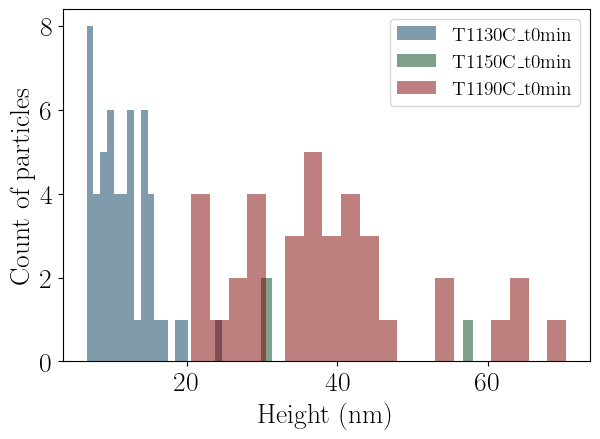

In [2]:
# Define a list of times
times = ['50min','40min','30min','15min','8min','6min','3min','0min']

# Define a list of temperatures
temps = ['1190C','1170C','1150C','1130C']

# Define the path to the directory containing AFM data
path = '../../AFM'
folder_names = [file for file in os.listdir(path) if file.startswith('24')]
h_dict = {}

# Iterate over each folder containing AFM data
for folder in folder_names:
    # Extract the name of the folder
    name = '_'.join(folder.split('_')[1:3])
    
    # List to store height data from all files within the current folder
    heights = []
    # Construct a pattern for the file names (e.g. "height", "height2", etc.) using the folder name
    file_pattern = f'{path}/{folder}/height'
    
    # Initialize a counter to keep track of how many height files exist within the current folder
    i = 2
    heights += (pd.read_csv(f'{file_pattern}', header=None)[0]*1e9).to_list()
    # Loop until we've found all height files or there's only one (to avoid unnecessary iterations)
    while True:
        # Construct the file path for the current height data CSV within the current folder
        file_name = f'{file_pattern}{i}'
        try:
            # Read in the height data from the CSV file, convert it to a list of floats (with units converted to nanometers), and append to the heights list
            heights += (pd.read_csv(file_name, header=None)[0]*1e9).to_list()
            
            # Increment the counter for the next iteration
            i += 1
            
        except FileNotFoundError:
            # If we reach a height file that doesn't exist, it means there's no more files in this folder
            break
        
    # Store the combined height data under the folder name as key in the dictionary
    h_dict[f'{name}'] = heights


x_axis = []

col = ['PuBu', 'BuGn', 'RdPu', 'OrRd']
for j, t in enumerate(reversed(temps)):
    # Loop through each time point
    cmap = plt.get_cmap(col[j])
    num_lines = len(times)
    plt.figure()

    for i, k in enumerate(times):
        try:
            exp = f'T{t}_t{k}'
            # Define a custom colormap
            color = cmap(1 - i / (num_lines - 1))

            # Create the plot with gradient bars
            n, bins, patches = plt.hist(
                h_dict[exp],
                bins=20,
                label=k,
                color=color,
                histtype='bar',
                rwidth=1, alpha=0.5
                )
            x_axis.append(exp)
        except:
            exp = f'T{t}_t{k}'
            print(exp)
    plt.legend(prop={'size': 14}, title=fr'{'°'.join((t.split('C')[0], 'C'))}')
    plt.xlabel('Height (nm)')
    plt.ylabel('Count of particles')

    #plt.savefig(f'figures/distribution_height_{t}.pdf', dpi=200, bbox_inches='tight')
    #plt.savefig(f'../figures/distribution_height_{t}.png', dpi=300, bbox_inches='tight')
    plt.show()
plt.figure()
for j, t in enumerate(reversed(temps)):
    cmap = plt.get_cmap(col[j])
    num_lines = len(times)
    
    for i, k in enumerate(times):
        try:
            if k == '0min':
                exp = f'T{t}_t{k}'
                color = cmap(i / (num_lines - 1))
                n, bins, patches = plt.hist(
                    h_dict[exp],
                    bins=20,
                    label=exp,
                    color=color,
                    histtype='bar',
                    rwidth=1, alpha=0.5
                    )
                x_axis.append(exp)
        except:
            exp = f'T{t}_t{k}'
            print(exp)
plt.legend(prop={'size': 14})
plt.xlabel('Height (nm)')
plt.ylabel('Count of particles')
plt.tight_layout()
#plt.savefig(f'figures/distribution_height_0min.pdf', dpi=200, bbox_inches='tight')
#plt.savefig(f'figures/distribution_height_0min.png', dpi=200, bbox_inches='tight')
plt.show()

C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\3518523975.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(heights, patch_artist=True, labels=temps[::-1])


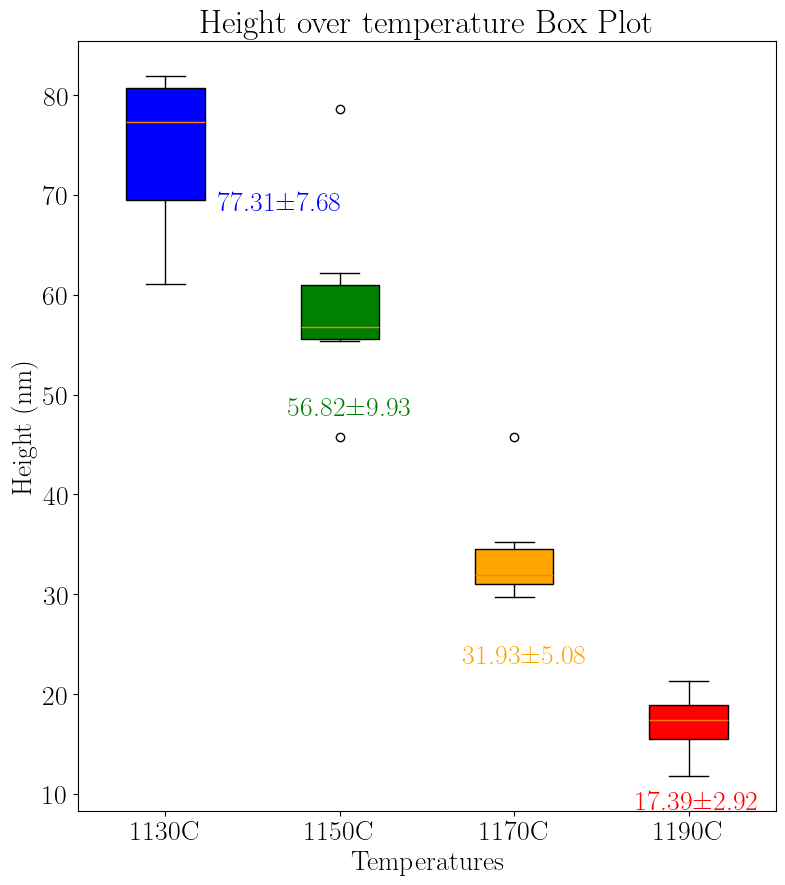

In [3]:
fig, ax = plt.subplots(figsize=(9,10))
temps = ['1190C','1170C','1150C','1130C']
times = ['50min','40min','30min','15min','8min','6min','3min','0min']
col = ['red', 'orange', 'green', 'blue']
heights = []
for t in reversed(temps):
    dh = []
    for k in times:
        if k == '0min':
            continue
        exp = f'T{t}_t{k}'
        # Attempt to retrieve experiment name from temperatures and times lists
        try:
            dh.append(np.mean(h_dict[exp]))
        except: 
             None
    heights.append(dh)
    
bplot = ax.boxplot(heights, patch_artist=True, labels=temps[::-1])
for patch, color in zip(bplot['boxes'], col[::-1]):
    patch.set_facecolor(color)
# Add text labels for the median values
pos = [1.3, 1.7, 2.7 , 3.7]
for i, median in enumerate(heights):
    var = np.std(median)
    median = np.median(median)
    ax.text(pos[i], median-8, f'{median:.2f}±{var:.2f}', ha='left', va='center', color=col[::-1][i])

ax.set_title('Height over temperature Box Plot')
ax.set_xlabel('Temperatures')
ax.set_ylabel('Height (nm)')
#plt.savefig('figures/boxplot_height_temps.png')
#plt.savefig('figures/boxplot_height_temps.pdf')
plt.show()


C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\742757054.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax[i].boxplot(dh, patch_artist=True, labels=labels, showfliers=False)
C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\742757054.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax[i].boxplot(dh, patch_artist=True, labels=labels, showfliers=False)
C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\742757054.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax[i].boxplot(dh, patch_artist=True, labels=labels, showfliers=False)
C:\Users\ad279661\AppData\Local\Temp\ipykernel

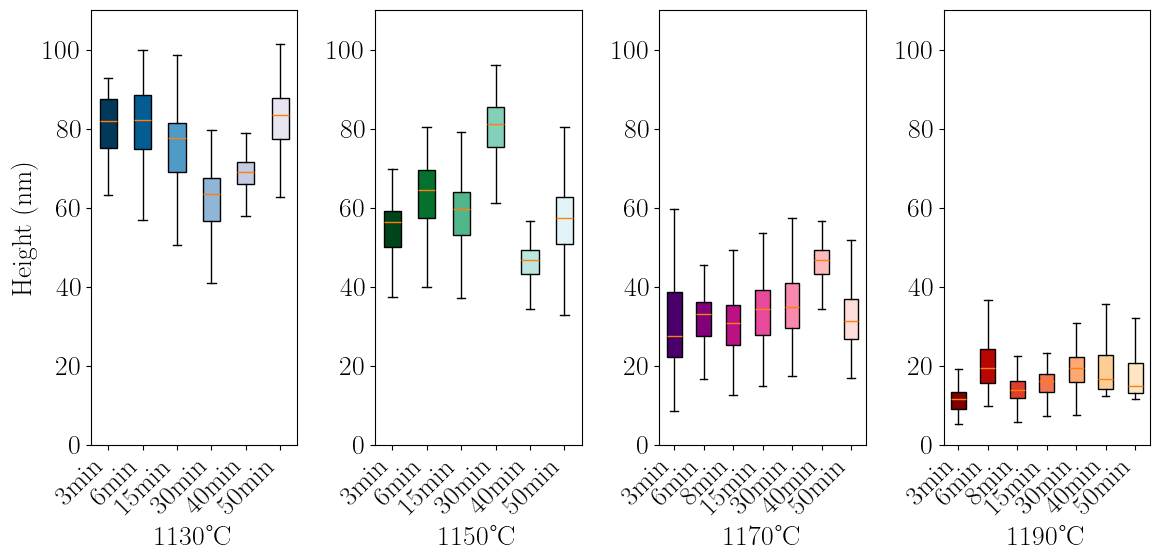

In [4]:
fig, ax = plt.subplots(1, 4, figsize=(12,6))
times = ['50min','40min','30min','15min','8min','6min','3min','0min']
temps = ['1190C','1170C','1150C','1130C']

heights = []
col = ['PuBu', 'BuGn', 'RdPu', 'OrRd']
for i, t in enumerate(reversed(temps)):
    labels = []
    dh = []
    cols = []
    cmap = plt.get_cmap(col[i])
    num_lines = len(times)

    for j, k in enumerate(reversed(times[:-1])):
        exp = f'T{t}_t{k}'
        color = cmap(1 - j / (num_lines - 1))
        try:
            dh.append(h_dict[exp])
            labels.append(k)
            cols.append(color)
        except: 
             None
    bplot = ax[i].boxplot(dh, patch_artist=True, labels=labels, showfliers=False)
    
    for patch, color in zip(bplot['boxes'], cols):
        patch.set_facecolor(color)
    ax[i].set_xticklabels(labels, rotation=45, ha='right')
    ax[i].set_xlabel('°'.join((t.split('C')[0], 'C')))
    ax[i].set_ylim([0,110])


#ax.set_title('Height over temperature Box Plot')
#ax.set_xlabel('Temperatures')
ax[0].set_ylabel('Height (nm)')
#ax.set_xticklabels(labels, rotation=45, ha='right')  # Rotate and align text for x-axis labels
fig.tight_layout()
#plt.savefig('../figures/boxplot_height_surfaces.png', dpi=300, bbox_inches='tight')
#plt.savefig('figures/boxplot_height_surfaces.pdf', dpi=200, bbox_inches='tight')
plt.show()


# Density

## Number of grains

C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\1963342037.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize=14)
C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\1963342037.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize=14)
C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\1963342037.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize=14)
C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\1963342037.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator

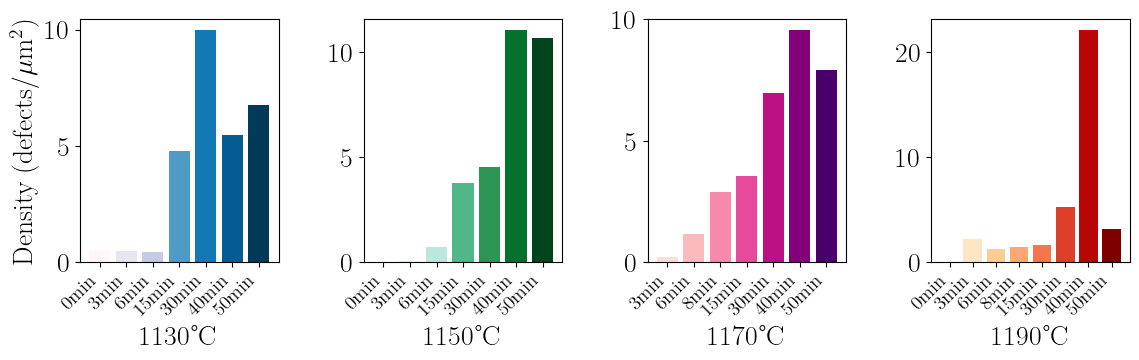

In [5]:
# Set path to directory containing AFM data
path = '../../AFM'
times = ['50min','40min','30min','15min','8min','6min','3min','0min']
temps = ['1190C','1170C','1150C','1130C']

# Get list of folder names
folder_names = [file for file in os.listdir(path) if file.startswith('24')]

# Initialize dictionary to store density values
density = {}

for folder in folder_names:
    # Extract the name of the folder 
    name = '_'.join(folder.split('_')[1:3])
    
    # List to store height data from all files within the current folder
    dens = 0
    # Construct a pattern for the file names (e.g. "height1", "height2", etc.) using the folder name
    file_pattern = f'{path}/{folder}/summary'

    with open(file_pattern, 'r', encoding='utf-8') as file:
        text = file.read()

    pattern = r"Number of grains:\s*(\d+)\s*"
    match = re.search(pattern, text)

    # Initialize a counter to keep track of how many height files exist within the current folder
    i = 1
    dens += float(match.group(1)) / 1e2

    # Loop until we've found all summary files or there's only one (to avoid unnecessary iterations)
    while True:
        # Construct the file path for the current height data CSV within the current folder
        file_name = f'{file_pattern}{i}'
        
        try:
            # Read in the density data from the CSV file, convert it to a list of floats (with units converted to nanometers), and append to the heights list
            with open(file_name, 'r', encoding='utf-8') as file:
                text = file.read()
            match = re.search(pattern, text)
            dens += float(match.group(1)) / 1e2
            
            # Increment the counter for the next iteration
            i += 1
            
        except FileNotFoundError:
            # If we reach a height file that doesn't exist, it means there's only one such file in this folder
            break
        
    # Store the combined height data under the folder name as key in the dictionary
    density[f'{name}'] = dens/i

fig, ax = plt.subplots(1, 4, figsize=(12,4))

col = ['PuBu', 'BuGn', 'RdPu', 'OrRd']
for i, t in enumerate(reversed(temps)):
    labels = []
    cols = []
    x_axis = []
    cmap = plt.get_cmap(col[i])
    num_lines = len(times)

    for j, k in enumerate(reversed(times)):
        exp = f'T{t}_t{k}'
        color = cmap(j / (num_lines - 1))
        try:

            exp = f'T{t}_t{k}'
            ax[i].bar(k, density[exp], color=color)
            labels.append(k)
        except:
            None
    ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize=14)
    ax[i].set_xlabel('°'.join((t.split('C')[0], 'C')))
    #ax[i].set_ylim([0,25])


# Customize plot axes and layout
#ax.set_xlabel('Experiments')
ax[0].set_ylabel(r'Density (defects/$\mu$m$^2$)')
#ax.set_yscale('linear')

# Save plot as PNG image file
fig.tight_layout()
#plt.savefig('../figures/density.png', dpi=300, bbox_inches='tight')
#plt.savefig('figures/density.pdf', dpi=200, bbox_inches='tight')

# Display plot in Jupyter Notebook output cell
plt.show()

## Projected Area

C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\2510681018.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize=14)
C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\2510681018.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize=14)
C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\2510681018.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize=14)
C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\2510681018.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator

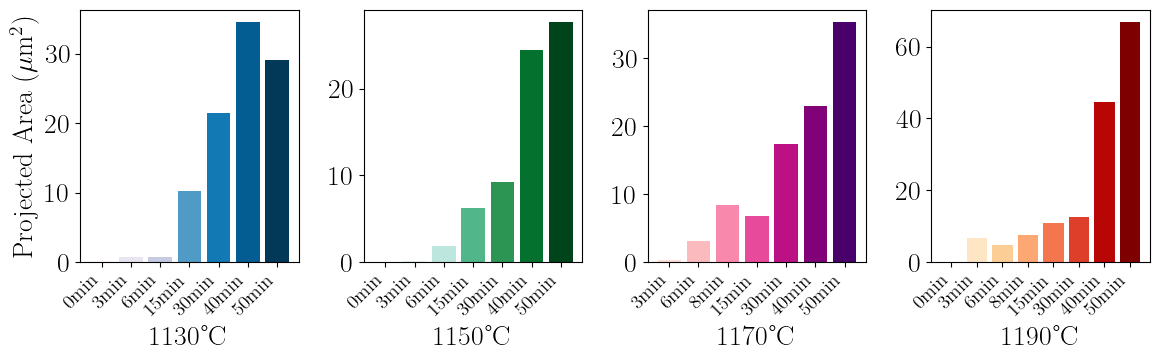

In [6]:
path = '../../AFM'
folder_names= [file for file in os.listdir(path) if file.startswith('24')]
density = {}
for folder in folder_names:
    # Extract the name of the folder
    name = '_'.join(folder.split('_')[1:3])
    
    # List to store height data from all files within the current folder
    dens = 0
    # Construct a pattern for the file names (e.g. "height1", "height2", etc.) using the folder name
    file_pattern = f'{path}/{folder}/summary'

    with open(file_pattern, 'r', encoding='utf-8') as file:
        text = file.read()

    pattern = r"Total projected area \(abs\.\):  \s*(\d+\.\d+|\d+)"
    match = re.search(pattern, text)
    
    # Initialize a counter to keep track of how many height files exist within the current folder
    i = 1
    if float(match.group(1)) < 100:
        dens += float(match.group(1))
    else: 
        dens += float(match.group(1)) * 1e-6

    # Loop until we've found all summary files or there's only one (to avoid unnecessary iterations)
    while True:
        # Construct the file path for the current height data CSV within the current folder
        file_name = f'{file_pattern}{i}'
        
        try:
            # Read in the density data from the CSV file, convert it to a list of floats (with units converted to nanometers), and append to the heights list
            with open(file_name, 'r', encoding='utf-8') as file:
                text = file.read()
            match = re.search(pattern, text)
            dens += float(match.group(1)) * 1e-6
            
            # Increment the counter for the next iteration
            i += 1
            
        except FileNotFoundError:
            # If we reach a height file that doesn't exist, it means there's only one such file in this folder
            break
        
    # Store the combined height data under the folder name as key in the dictionary
    density[f'{name}'] = dens/i


fig, ax = plt.subplots(1, 4, figsize=(12,4))

col = ['PuBu', 'BuGn', 'RdPu', 'OrRd']
for i, t in enumerate(reversed(temps)):
    labels = []
    cols = []
    x_axis = []
    cmap = plt.get_cmap(col[i])
    num_lines = len(times)

    for j, k in enumerate(reversed(times)):
        exp = f'T{t}_t{k}'
        color = cmap(j / (num_lines - 1))
        try:

            exp = f'T{t}_t{k}'
            ax[i].bar(k, density[exp], color=color)
            labels.append(k)
        except:
            None
    ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize=14)
    ax[i].set_xlabel('°'.join((t.split('C')[0], 'C')))
    #ax[i].set_ylim([0,0.7])

ax[0].set_ylabel(r'Projected Area ($\mu$m$^2$)')
fig.tight_layout()
#plt.savefig('../figures/area_proj.png', dpi=300, bbox_inches='tight')
#plt.savefig('figures/area.pdf', dpi=200, bbox_inches='tight')
plt.show()

C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\2306326766.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize=14)
C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\2306326766.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize=14)
C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\2306326766.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize=14)
C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\2306326766.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator

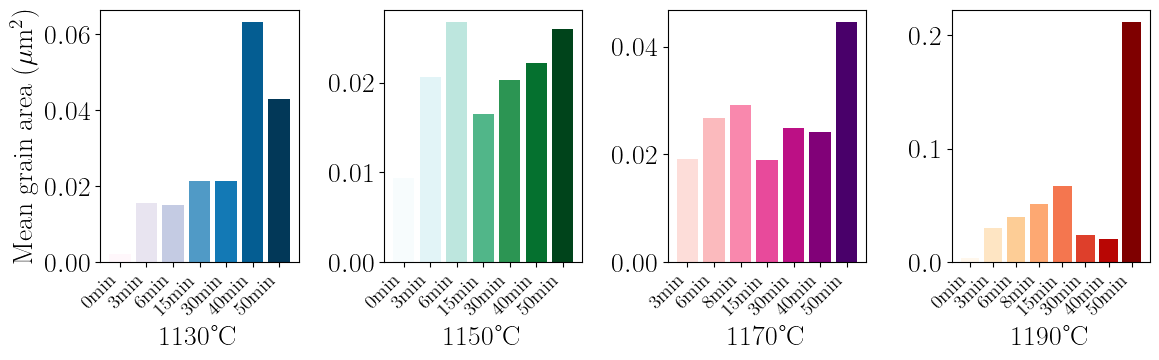

In [8]:
path = '../../AFM'
times = ['50min','40min','30min','15min','8min','6min','3min','0min']
temps = ['1190C','1170C','1150C','1130C']

folder_names= [file for file in os.listdir(path) if file.startswith('24')]
grain = {}
for folder in folder_names:
    # Extract the name of the folder
    name = '_'.join(folder.split('_')[1:3])
    
    # List to store height data from all files within the current folder
    dens = 0
    # Construct a pattern for the file names (e.g. "height1", "height2", etc.) using the folder name
    file_pattern = f'{path}/{folder}/summary'

    with open(file_pattern, 'r', encoding='utf-8') as file:
        text = file.read()
    
    pattern = r"Mean grain area:  \s*(\d+\.\d+|\d+)"
    match = re.search(pattern, text)

    # Initialize a counter to keep track of how many height files exist within the current folder
    i = 1
    dens += float(match.group(1))

    # Loop until we've found all summary files or there's only one (to avoid unnecessary iterations)
    while True:
        # Construct the file path for the current height data CSV within the current folder
        file_name = f'{file_pattern}{i}'
        
        try:
            # Read in the density data from the CSV file, convert it to a list of floats (with units converted to nanometers), and append to the heights list
            with open(file_name, 'r', encoding='utf-8') as file:
                text = file.read()
            match = re.search(pattern, text)
            dens += float(match.group(1))
            
            # Increment the counter for the next iteration
            i += 1
            
        except FileNotFoundError:
            # If we reach a height file that doesn't exist, it means there's only one such file in this folder
            break
        
    # Store the combined height data under the folder name as key in the dictionary
    grain[f'{name}'] = dens/i


fig, ax = plt.subplots(1, 4, figsize=(12,4))
grain_m = {
    '1190C': [],
    '1170C': [],
    '1150C': [],
    '1130C': []
}
col = ['PuBu', 'BuGn', 'RdPu', 'OrRd']
for i, t in enumerate(reversed(temps)):
    labels = []
    cols = []
    x_axis = []
    cmap = plt.get_cmap(col[i])
    num_lines = len(times)

    for j, k in enumerate(reversed(times)):
        exp = f'T{t}_t{k}'
        color = cmap(j / (num_lines - 1))
        try:

            exp = f'T{t}_t{k}'
            ax[i].bar(k, grain[exp]*1e-6, color=color)
            grain_m[t].append(grain[exp]*1e-6)
            labels.append(k)
        except:
            None
    ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize=14)
    ax[i].set_xlabel('°'.join((t.split('C')[0], 'C')))
    #ax[i].set_ylim([0,0.7])

ax[0].set_ylabel(r'Mean grain area ($\mu$m$^2$)')
fig.tight_layout()
#plt.savefig('../figures/area_grain.png', dpi=300, bbox_inches='tight')
#plt.savefig('figures/grain_area.pdf', dpi=200, bbox_inches='tight')
plt.show()

C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\1306193552.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize=14)
C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\1306193552.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize=14)
C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\1306193552.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize=14)
C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\1306193552.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator

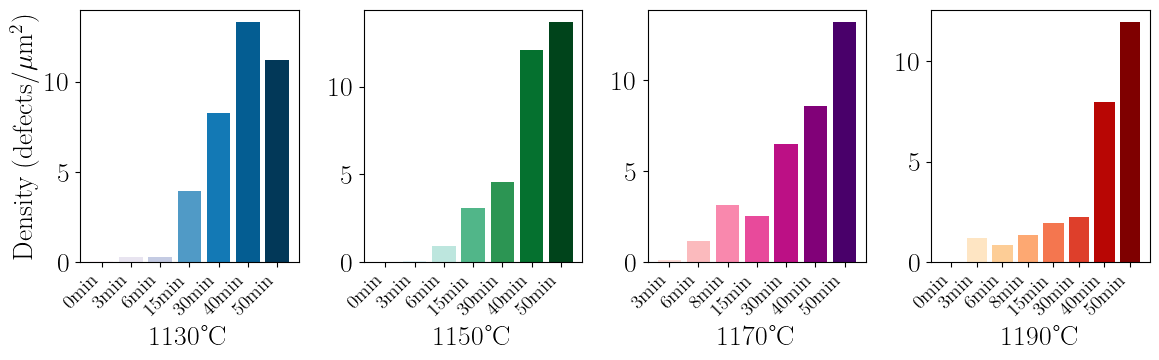

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(12,4))
times = ['50min','40min','30min','15min','8min','6min','3min','0min']
temps = ['1190C','1170C','1150C','1130C']

col = ['PuBu', 'BuGn', 'RdPu', 'OrRd']
for i, t in enumerate(reversed(temps)):
    labels = []
    cols = []
    x_axis = []
    cmap = plt.get_cmap(col[i])
    num_lines = len(times)

    for j, k in enumerate(reversed(times)):
        exp = f'T{t}_t{k}'
        color = cmap(j / (num_lines - 1))
        try:

            exp = f'T{t}_t{k}'
            ax[i].bar(k, density[exp]/np.mean(grain_m[t]) * 1e-2, color=color)
            labels.append(k)
        except:
            None
    ax[i].set_xticklabels(labels, rotation=45, ha='right', fontsize=14)
    ax[i].set_xlabel('°'.join((t.split('C')[0], 'C')))
    #ax[i].set_ylim([0,0.7])

ax[0].set_ylabel(r'Density (defects/$\mu$m$^2$)')
fig.tight_layout()
#plt.savefig('../figures/area_dist.png', dpi=300, bbox_inches='tight')
#plt.savefig('figures/density_area.pdf', dpi=200, bbox_inches='tight')
plt.show()

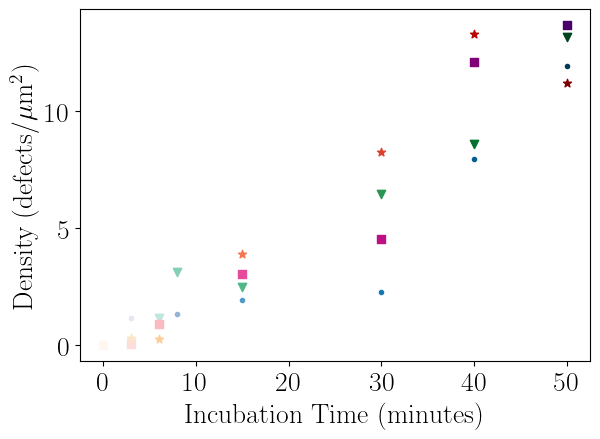

{'T1190C_t0min': 0.0007071990201237723, 'T1190C_t3min': 1.1856638092599057, 'T1190C_t6min': 0.8541572361646556, 'T1190C_t8min': 1.3506946549827121, 'T1190C_t15min': 1.948643476703159, 'T1190C_t30min': 2.2666067400960643, 'T1190C_t40min': 7.957886611439088, 'T1190C_t50min': 11.935669011012447, 'T1170C_t3min': 0.14292944990513035, 'T1170C_t6min': 1.1590244016865958, 'T1170C_t8min': 3.158717854532447, 'T1170C_t15min': 2.515461438767073, 'T1170C_t30min': 6.471860837188275, 'T1170C_t40min': 8.596046021524408, 'T1170C_t50min': 13.186181813916814, 'T1150C_t0min': 0.013948946563049045, 'T1150C_t3min': 0.08143161058414342, 'T1150C_t6min': 0.9383943692455325, 'T1150C_t15min': 3.059717596827742, 'T1150C_t30min': 4.562196161967136, 'T1150C_t40min': 12.115642042716328, 'T1150C_t50min': 13.685125834926989, 'T1130C_t0min': 0.041332359374181483, 'T1130C_t3min': 0.30116715905365854, 'T1130C_t6min': 0.2600923726185864, 'T1130C_t15min': 3.927293262600294, 'T1130C_t30min': 8.245534433827855, 'T1130C_t40mi

In [10]:
fig, ax = plt.subplots()
density_dict = {}
area_dict = {}
times = ['50min','40min','30min','15min','8min','6min','3min','0min']
temps = ['1190C','1170C','1150C','1130C']

col = ['PuBu', 'BuGn', 'RdPu', 'OrRd']
marks = [".", "v", "s", "*"]
x = np.array((0, 3, 6, 8, 15, 30, 40, 50))
for i, t in enumerate(temps):
    labels = []
    cols = []
    x_axis = []
    cmap = plt.get_cmap(col[i])
    num_lines = len(times)

    for j, k in enumerate(reversed(times)):
        exp = f'T{t}_t{k}'
        color = cmap(j / (num_lines - 1))
        try:

            exp = f'T{t}_t{k}'
            ax.scatter(x[j], density[exp]/np.mean(grain_m[t]) * 1e-2, color=color, marker=marks[i])
            labels.append(k)
            density_dict[f'{exp}'] = density[exp]/np.mean(grain_m[t]) * 1e-2
            area_dict[f'{exp}'] = density[exp]

        except:
            None

ax.set_ylabel(r'Density (defects/$\mu$m$^2$)')
ax.set_xlabel(r'Incubation Time (minutes)')
#ax.legend()
fig.tight_layout()
#plt.savefig('../figures/area_dens.png', dpi=300, bbox_inches='tight')
#plt.savefig('figures/density_time.pdf', dpi=200, bbox_inches='tight')
plt.show()
np.save('density_dict.npy', density_dict) 
np.save('area_dict.npy', area_dict) 
print(density_dict)
print(area_dict)

C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\3136426565.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(lab, rotation=45, ha='right', fontsize=14)
C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\3136426565.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(lab, rotation=45, ha='right', fontsize=14)
C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\3136426565.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(lab, rotation=45, ha='right', fontsize=14)
C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\3136426565.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xtickla

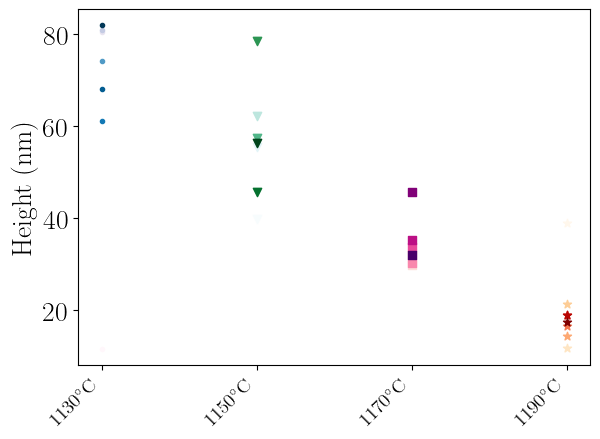

{'T1130C_t0min': 11.529538301886797, 'T1130C_t3min': 80.538086, 'T1130C_t6min': 80.82033428571428, 'T1130C_t15min': 74.07565774058577, 'T1130C_t30min': 61.095282246740226, 'T1130C_t40min': 68.0214552293578, 'T1130C_t50min': 81.96254752475247, 'T1150C_t0min': 39.7131, 'T1150C_t3min': 55.38669, 'T1150C_t6min': 62.17459753086419, 'T1150C_t15min': 57.391570485436894, 'T1150C_t30min': 78.59294527472527, 'T1150C_t40min': 45.76507909502263, 'T1150C_t50min': 56.253846371347784, 'T1170C_t3min': 29.76020874301676, 'T1170C_t6min': 31.928711877394637, 'T1170C_t8min': 30.275071454545454, 'T1170C_t15min': 33.7395654494382, 'T1170C_t30min': 35.265027994228, 'T1170C_t40min': 45.76507909502263, 'T1170C_t50min': 31.878364597478175, 'T1190C_t0min': 38.88601111111112, 'T1190C_t3min': 11.852314629629628, 'T1190C_t6min': 21.313636693548386, 'T1190C_t8min': 14.423953055555558, 'T1190C_t15min': 16.597073782051282, 'T1190C_t30min': 18.948618045112784, 'T1190C_t40min': 18.939070912220313, 'T1190C_t50min': 17.38

In [11]:
fig, ax = plt.subplots()
times = ['50min','40min','30min','15min','8min','6min','3min','0min']
temps = ['1190C','1170C','1150C','1130C']
height_dict = {}
col = ['PuBu', 'BuGn', 'RdPu', 'OrRd']
marks = [".", "v", "s", "*"]
lab = (r'1130$^\circ$C',r'1150$^\circ$C',r'1170$^\circ$C',r'1190$^\circ$C')
for i, t in enumerate(reversed(temps)):
    labels = []
    cols = []
    x_axis = []
    cmap = plt.get_cmap(col[i])
    num_lines = len(times)

    for j, k in enumerate(reversed(times)):
        exp = f'T{t}_t{k}'
        color = cmap(j / (num_lines - 1))
        try:

            exp = f'T{t}_t{k}'
            ax.scatter(t, np.mean(h_dict[exp]), color=color, marker=marks[i])
            labels.append(k)
            height_dict[f'{exp}'] = np.mean(h_dict[exp])
        except:
            None
    ax.set_xticklabels(lab, rotation=45, ha='right', fontsize=14)

ax.set_ylabel(r'Height (nm)')
#ax.legend()
fig.tight_layout()
#plt.savefig('../figures/area.png', dpi=300, bbox_inches='tight')
#plt.savefig('figures/height_T.pdf', dpi=200, bbox_inches='tight')
plt.show()
np.save('height_dict.npy', height_dict) 
print(height_dict)

['1130C', '1150C', '1170C', '1190C', '24-05-31_T1130C_t15min', '24-05-31_T1150C_t15min', '24-06-18_T1130C_t40min', '24-06-18_T1150C_t40min', '24-06-18_T1170C_t30min', '24-06-18_T1190C_t40min', '24-07-02_T1170C_t40min', '24-07-02_T1190C_t15min', '24-07-02_T1190C_t6min', '24-07-04_T1170C_t8min', '24-07-04_T1190C_t30min', '24-07-04_T1190C_t3min', '24-07-04_T1190C_t50min', '24-07-04_T1190C_t8min', '24-07-05_T1130C_t3min', '24-07-05_T1130C_t50min', '24-07-05_T1130C_t6min', '24-07-05_T1150C_t50min', '24-07-05_T1170C_t50min', '24-07-05_T1170C_t6min', '24-07-30_T1130C_t30min', '24-07-30_T1150C_t30min', '24-07-30_T1150C_t3min', '24-07-30_T1150C_t6min', '24-07-30_T1170C_t15min', '24-07-31_T1130C_t0min', '24-07-31_T1150C_t0min', '24-07-31_T1170C_t3min', '24-07-31_T1190C_t0min', 'AFM.xlsx', 'de cuyper_alexandre.bmp', 'height1', 'raw', 'todo', 'traité', '~$AFM.xlsx']


C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\3751577968.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  C1130 = pd.read_csv('../../AFM/1130C', header=None, delimiter='  ')
C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\3751577968.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  C1150 = pd.read_csv('../../AFM/1150C', header=None, delimiter='  ')
C:\Users\ad279661\AppData\Local\Temp\ipykernel_8676\3751577968.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as re

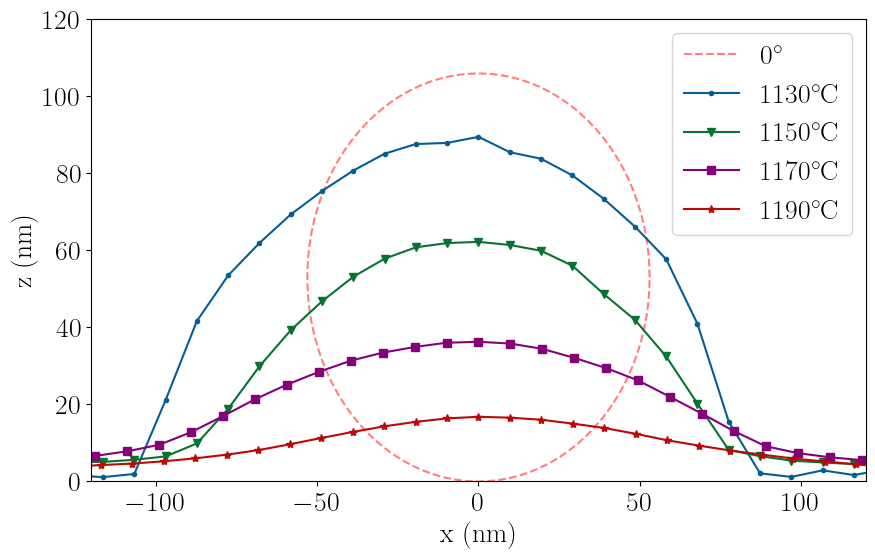

In [14]:
print(os.listdir('../../AFM'))
from scipy.signal import find_peaks
C1130 = pd.read_csv('../../AFM/1130C', header=None, delimiter='  ')
C1150 = pd.read_csv('../../AFM/1150C', header=None, delimiter='  ')
C1170 = pd.read_csv('../../AFM/1170C', header=None, delimiter='  ')
C1190 = pd.read_csv('../../AFM/1190C', header=None, delimiter='  ')
C1130[1] += 5e-9
data = (C1130,C1150,C1170,C1190)
lab = (r'1130$^\circ$C',r'1150$^\circ$C',r'1170$^\circ$C',r'1190$^\circ$C')
col = ['PuBu', 'BuGn', 'RdPu', 'OrRd']
marks = [".", "v", "s", "*"]
color = cmap(j / (num_lines - 1))
from scipy.stats import norm
plt.figure(figsize=(10, 6))

R = 53
h1 = 60
theta = np.linspace(0, 2*np.pi, 100)
x = R*np.cos(theta)
y = R*np.sin(theta)+R
plt.plot(x, y, '--', label=r'0$^\circ$', c='r', alpha=0.5, zorder=1)

for i, df in enumerate(data):
    max = find_peaks(df[1], width=2)[0][0]
    cmap = plt.get_cmap(col[i])
    color = cmap(0.85)
    plt.plot((df[0] - df[0][max])*1e9, df[1]*1e9, '.-', color=color, label=fr'{lab[i]}', marker=marks[i])
plt.xlabel('x (nm)')
plt.ylabel('z (nm)')
plt.ylim([0,120])
plt.xlim([-120,120])
plt.legend()
#plt.savefig('../figures/defects.png', dpi=300)
plt.show()

In [15]:
# Define the path to the directory containing AFM data
path = '../../AFM'
folder_names = [file for file in os.listdir(path) if file.startswith('24')]
area = {}

# Iterate over each folder containing AFM data
for folder in folder_names:
    # Extract the name of the folder by joining the second and third parts (split at underscores)
    name = '_'.join(folder.split('_')[1:3])
    # List to store height data from all files within the current folder
    try:
        # Construct a pattern for the file names (e.g. "height", "height2", etc.) using the folder name
        file_pattern = f'{path}/{folder}/area'
        area[f'{name}'] = pd.read_csv(f'{file_pattern}', header=None, delimiter ='\t')
    except: None

print(area.keys())
np.save('area.npy', area)

dict_keys(['T1130C_t15min', 'T1150C_t15min', 'T1130C_t40min', 'T1150C_t40min', 'T1170C_t30min', 'T1190C_t40min', 'T1170C_t40min', 'T1190C_t15min', 'T1190C_t6min', 'T1170C_t8min', 'T1190C_t30min', 'T1190C_t3min', 'T1190C_t50min', 'T1190C_t8min', 'T1130C_t3min', 'T1130C_t50min', 'T1130C_t6min', 'T1150C_t50min', 'T1170C_t6min', 'T1130C_t30min', 'T1150C_t30min', 'T1150C_t3min', 'T1150C_t6min', 'T1170C_t15min', 'T1170C_t3min'])
